In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import (
    read_osu_log, read_osu_log_multi, plot_osu, 
    bcast_algo_intelmpi, bcast_algo_openmpi3, bcast_algo_openmpi4
)

In [3]:
ls osu_log_c5n/bcast/N8n288/

run1/ run2/ run3/ run4/ run5/


In [4]:
TOP_DIR = './osu_log_c5n/bcast/N8n288/run3/'

In [5]:
def plot_barh(df):
    fig, axes = plt.subplots(5, 1, figsize=[8, 16])

    for ax, message in zip(axes, [1, 1024, 16384, 65536, 1048576]):
        df.loc[message].plot.barh(grid=True, ax=ax)
        ax.set_xlim(0, df.loc[message]['default'] * 5)
        ax.set_title('message size = {}'.format(message))
        ax.vlines(df.loc[message]['default'], -0.5, df.shape[1], linestyle='--')

    fig.tight_layout()


## OpenMPI3

In [6]:
ompi3_dir = TOP_DIR + 'openmpi3/'

ompi3_file_list = [ompi3_dir + 'bcast_default.log'] + [ompi3_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 7)]
ompi3_file_list

['./osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_default.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo0.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo1.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo2.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo3.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo4.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo5.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi3/bcast_algo6.log']

In [7]:
df_ompi3 = read_osu_log_multi(ompi3_file_list, ['default'] + bcast_algo_openmpi3)
df_ompi3

,default,0. ignore,1. basic linear,2. chain,3. pipeline,4. split binary tree,5. binary tree,6. binomial tree
size,,,,,,,,
1,138.65,92.18,437.16,185.13,640.79,638.33,130.98,100.59
2,100.94,101.69,445.22,503.77,698.10,183.48,133.64,108.43
4,130.25,95.01,447.44,218.73,800.98,160.87,138.72,101.03
8,102.60,103.04,446.13,188.59,790.22,172.60,141.70,102.76
16,101.92,98.84,416.69,336.79,817.11,166.14,160.08,103.61
32,101.85,103.94,418.24,192.47,660.61,165.98,184.76,114.32
64,122.96,102.27,419.34,194.68,672.88,197.16,143.63,107.46
128,104.69,103.60,423.69,196.28,820.65,212.51,143.33,105.85
256,104.45,101.98,424.95,196.72,870.72,171.73,143.82,106.17


(0, 8000)

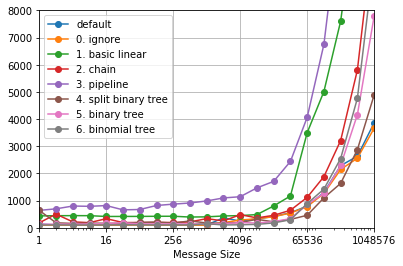

In [8]:
plot_osu(df_ompi3)
plt.ylim(0, 8000)

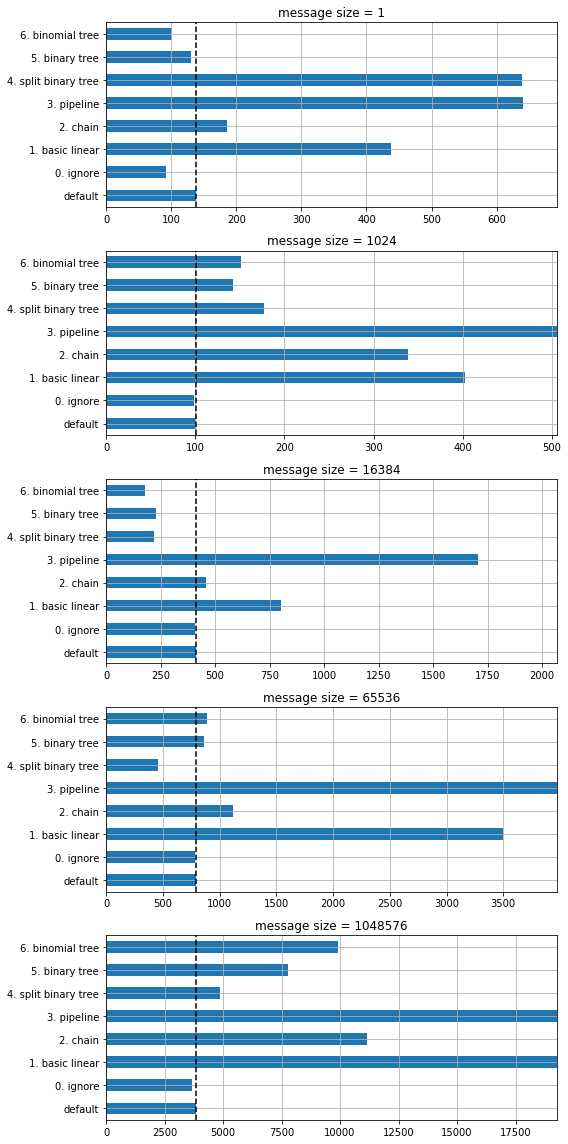

In [9]:
plot_barh(df_ompi3)

# OpenMPI4

In [10]:
ompi4_dir = TOP_DIR + 'openmpi4/'

ompi4_file_list = [ompi4_dir + 'bcast_default.log'] + [ompi4_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 10)]
ompi4_file_list

['./osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_default.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo0.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo1.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo2.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo3.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo4.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo5.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo6.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo7.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo8.log',
 './osu_log_c5n/bcast/N8n288/run3/openmpi4/bcast_algo9.log']

In [11]:
df_ompi4 = read_osu_log_multi(ompi4_file_list, ['default'] + bcast_algo_openmpi4)
df_ompi4

,default,0. ignore,1. basic linear,2. chain,3. pipeline,4. split binary tree,5. binary tree,6. binomial tree,7. knomial tree,8. scatter_allgather,9. scatter_allgather_ring
size,,,,,,,,,,,
1,92.02,96.06,402.30,324.14,595.69,615.35,133.86,90.37,56.48,411.02,394.13
2,92.93,103.51,401.44,263.05,667.70,165.78,137.84,95.10,54.68,412.38,396.78
4,92.97,101.37,403.59,370.26,775.42,155.83,337.53,100.72,249.43,414.71,398.69
8,94.69,101.33,503.82,329.27,605.28,161.71,144.03,99.69,57.99,414.81,397.69
16,93.57,101.78,403.56,173.02,805.57,156.48,169.26,98.69,57.92,413.30,398.17
32,147.75,107.17,401.16,409.34,614.28,162.09,142.89,99.26,55.70,408.82,399.11
64,102.59,111.04,403.09,210.48,621.37,157.45,147.83,114.96,58.16,412.01,400.82
128,102.96,106.76,407.40,327.69,623.00,164.68,245.87,128.85,58.04,415.17,404.81
256,125.19,109.65,408.98,176.62,627.63,182.42,367.62,106.37,59.40,418.22,405.76


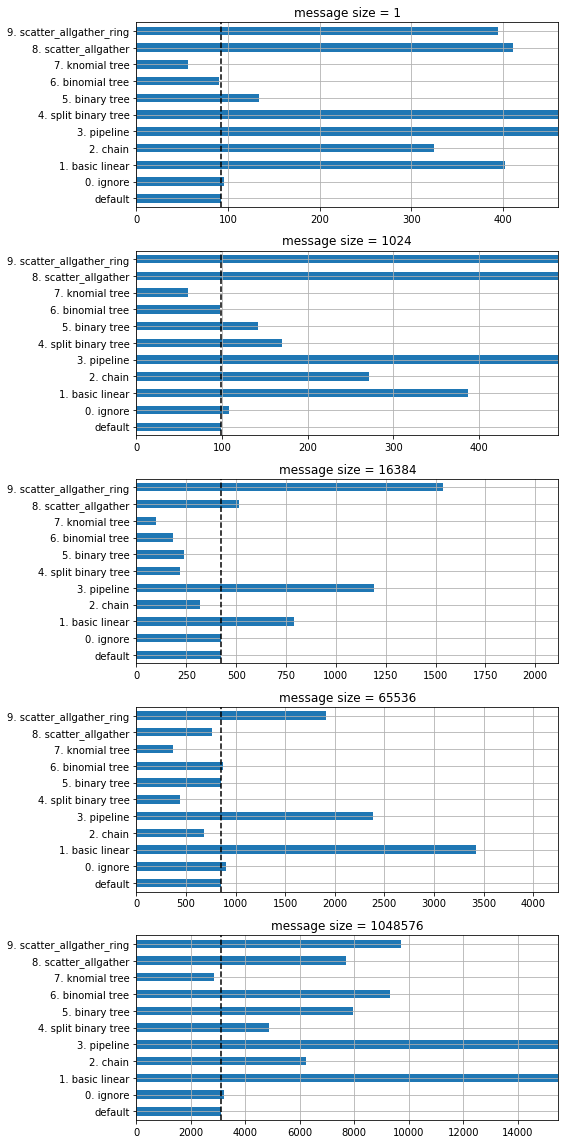

In [12]:
plot_barh(df_ompi4)

## MPICH

In [13]:
mpich_dir = TOP_DIR + 'mpich3/'

In [14]:
df_mpich = read_osu_log_multi([mpich_dir + 'bcast_default.log'], columns=['default'])
df_mpich

,default
size,
1,44.27
2,41.02
4,41.74
8,43.04
16,42.86
32,48.30
64,45.97
128,45.67
256,46.06


## Intel MPI

In [15]:
impi_dir = TOP_DIR + '/intelmpi-tcp/'

impi_file_list = [impi_dir + 'bcast_default.log'] + [impi_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]
impi_file_list

['./osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_default.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo1.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo2.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo3.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo4.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo5.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo6.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo7.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo8.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo9.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo10.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo11.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo12.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo13.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-tcp/bcast_algo14.log']

In [16]:
df_impi = read_osu_log_multi(impi_file_list, ['default'] + bcast_algo_intelmpi)
df_impi

,default,1. Binomial,2. Recursive doubling,3. Ring,4. Topology aware binomial,5. Topology aware recursive doubling,6. Topology aware ring,7. Shumilin's,8. Knomial,9. Topology aware SHM-based flat,10. Topology aware SHM-based Knomial,11. Topology aware SHM-based Knary,12. NUMA aware SHM-based (SSE4.2),13. NUMA aware SHM-based (AVX2),14. NUMA aware SHM-based (AVX512)
size,,,,,,,,,,,,,,,
1,36.45,72.04,72.54,1233.92,50.97,111.65,278.35,201.26,83.07,39.07,34.44,31.74,33.51,39.71,40.03
2,35.21,70.80,71.48,1230.70,50.30,116.45,284.39,189.87,82.14,35.73,30.54,30.24,31.41,37.25,36.77
4,35.71,70.60,71.40,1228.15,50.94,127.18,325.17,189.52,81.79,36.56,31.27,31.00,31.53,37.01,37.50
8,35.87,70.26,71.58,1228.80,50.56,183.96,524.53,190.68,82.12,35.86,31.41,30.73,31.46,37.39,38.37
16,35.99,70.62,71.32,1228.78,50.28,184.13,350.57,189.87,82.17,35.54,31.03,31.00,31.32,37.62,37.67
32,36.56,72.24,72.59,1227.88,51.81,185.72,360.70,195.23,83.70,36.64,32.03,31.39,33.26,37.89,41.34
64,36.18,72.62,73.34,1229.33,51.98,188.01,361.13,198.89,83.75,36.60,31.99,31.22,32.81,37.91,38.51
128,36.73,72.37,73.44,1257.60,52.06,188.46,362.97,201.07,83.51,37.01,32.37,31.25,33.13,38.21,38.75
256,36.21,246.90,252.18,1311.52,155.23,188.66,368.97,163.17,74.45,34.87,31.85,30.76,32.77,34.26,35.89


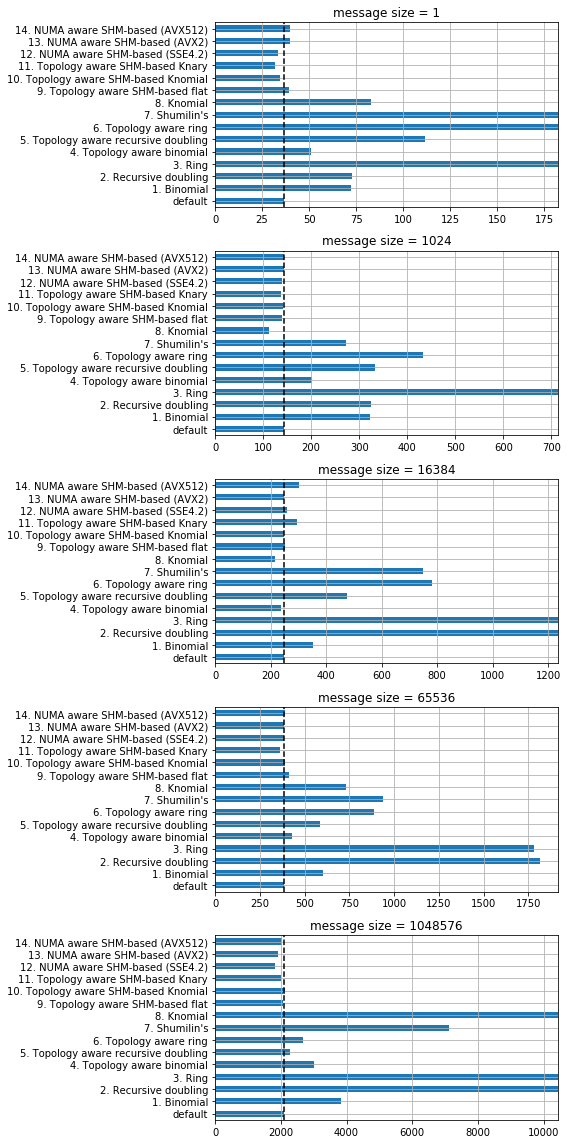

In [17]:
plot_barh(df_impi)

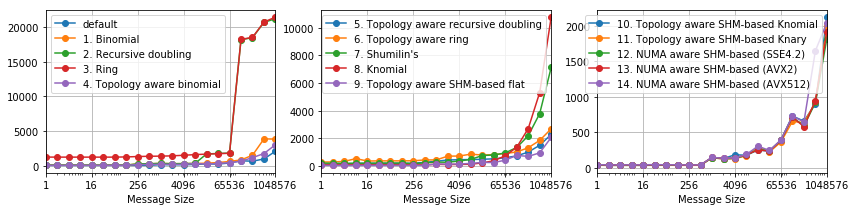

In [18]:
fig, axes = plt.subplots(1, 3, figsize=[14, 3])

plot_osu(df_impi.iloc[:, 0:5], ax=axes[0])
plot_osu(df_impi.iloc[:, 5:10], ax=axes[1])
plot_osu(df_impi.iloc[:, 10:], ax=axes[2])

## Intel MPI EFA

In [19]:
impi_efa_dir = TOP_DIR + '/intelmpi-efa/'

impi_efa_file_list = [impi_efa_dir + 'bcast_default.log'] + [impi_efa_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]
impi_efa_file_list

['./osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_default.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo1.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo2.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo3.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo4.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo5.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo6.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo7.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo8.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo9.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo10.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo11.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo12.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo13.log',
 './osu_log_c5n/bcast/N8n288/run3//intelmpi-efa/bcast_algo14.log']

In [20]:
df_impi_efa = read_osu_log_multi(impi_efa_file_list, ['default'] + bcast_algo_intelmpi)
df_impi_efa

,default,1. Binomial,2. Recursive doubling,3. Ring,4. Topology aware binomial,5. Topology aware recursive doubling,6. Topology aware ring,7. Shumilin's,8. Knomial,9. Topology aware SHM-based flat,10. Topology aware SHM-based Knomial,11. Topology aware SHM-based Knary,12. NUMA aware SHM-based (SSE4.2),13. NUMA aware SHM-based (AVX2),14. NUMA aware SHM-based (AVX512)
size,,,,,,,,,,,,,,,
1,20.33,120.34,117.98,706.25,93.28,80.24,149.89,97.22,30.18,20.27,20.14,20.62,20.53,19.98,20.81
2,20.32,119.65,118.92,717.62,78.34,112.12,161.69,86.78,29.63,20.33,20.29,20.89,20.31,19.92,20.67
4,20.50,120.21,126.40,771.78,78.70,143.43,195.46,87.36,29.82,20.59,20.26,20.81,20.36,20.11,20.62
8,20.58,119.69,119.39,855.77,78.42,174.34,314.41,86.90,29.56,20.49,20.71,20.88,20.33,20.00,20.86
16,20.66,119.72,118.77,1053.32,78.95,173.93,315.34,87.20,29.60,20.63,20.42,20.43,20.54,19.87,20.57
32,20.44,120.00,119.08,1519.47,78.63,173.68,315.19,89.38,29.69,20.45,20.41,20.36,20.09,20.02,20.51
64,20.58,120.60,118.62,2420.69,78.26,174.39,315.92,92.37,29.79,20.81,20.68,20.11,20.21,19.89,20.20
128,20.52,120.28,119.07,4172.75,78.92,174.45,315.60,93.81,30.12,20.90,20.65,20.26,20.36,19.96,20.77
256,20.87,121.13,119.46,7802.39,78.71,174.65,316.05,96.62,30.60,21.05,20.75,20.65,20.56,20.16,20.87


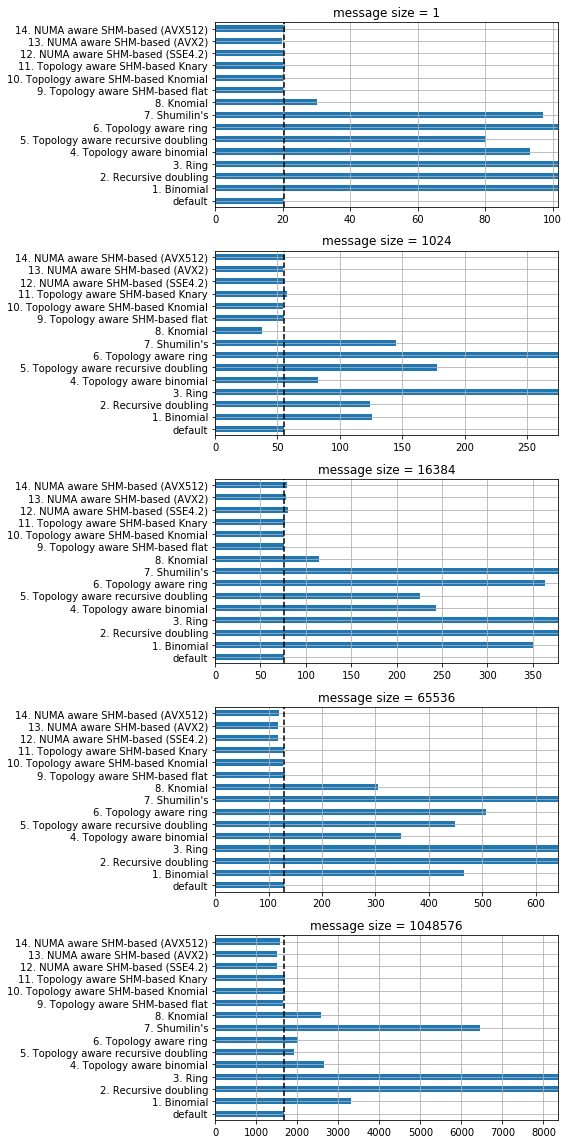

In [21]:
plot_barh(df_impi_efa)

# Put all together

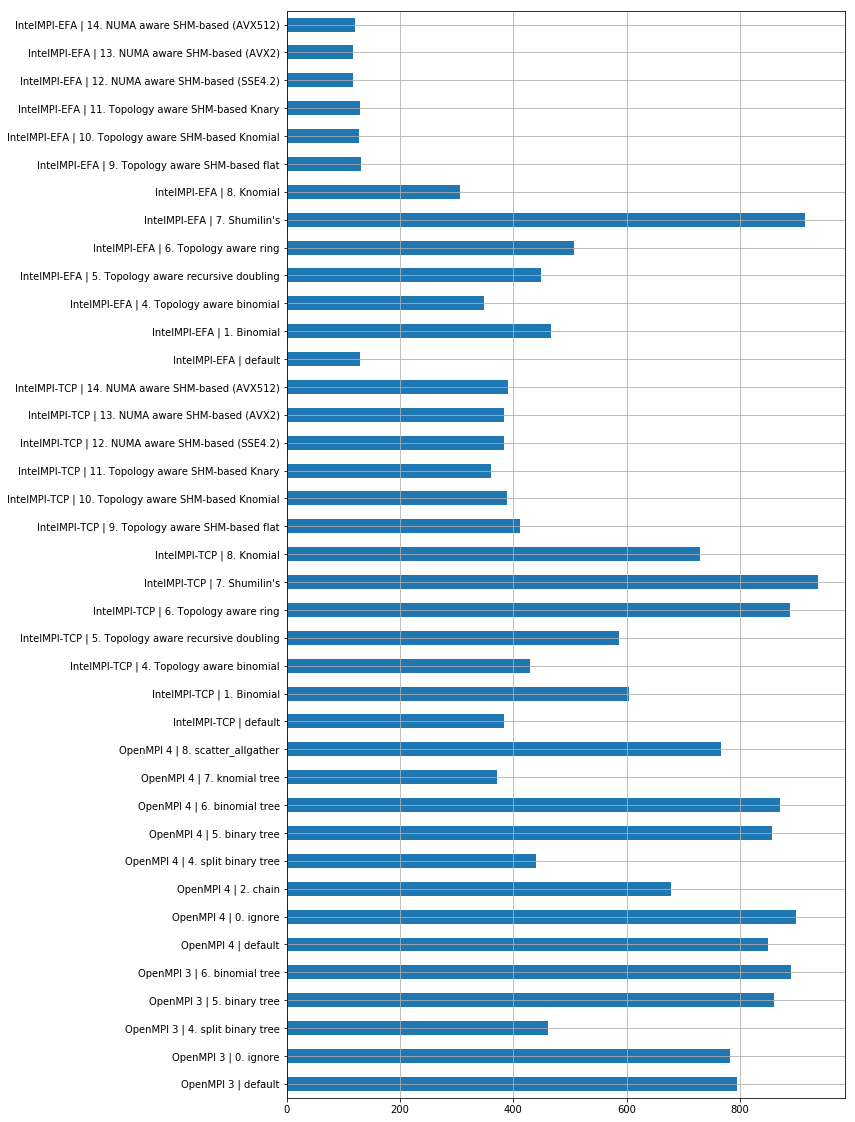

In [22]:
df_all = pd.concat(
    [df_ompi3.add_prefix('OpenMPI 3 | '), 
     df_ompi4.add_prefix('OpenMPI 4 | '), 
     df_mpich.add_prefix('MPICH 3 | '), 
     df_impi.add_prefix('IntelMPI-TCP | '),
     df_impi_efa.add_prefix('IntelMPI-EFA | ')
    ], axis=1)

df_select = df_all.loc[65536]
df_select = df_select[df_select < df_select['OpenMPI 3 | default']*1.2]
df_select.plot.barh(figsize=[10, 20], grid=True)


In [23]:
df_default = df_all.filter(like='default', axis=1)
df_default 


,OpenMPI 3 | default,OpenMPI 4 | default,MPICH 3 | default,IntelMPI-TCP | default,IntelMPI-EFA | default
size,,,,,
1,138.65,92.02,44.27,36.45,20.33
2,100.94,92.93,41.02,35.21,20.32
4,130.25,92.97,41.74,35.71,20.50
8,102.60,94.69,43.04,35.87,20.58
16,101.92,93.57,42.86,35.99,20.66
32,101.85,147.75,48.30,36.56,20.44
64,122.96,102.59,45.97,36.18,20.58
128,104.69,102.96,45.67,36.73,20.52
256,104.45,125.19,46.06,36.21,20.87


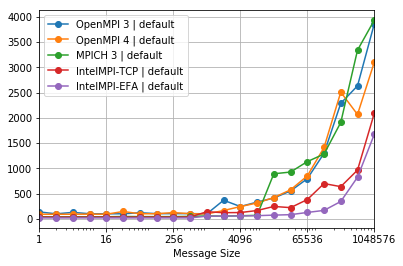

In [24]:
plot_osu(df_default)